In [1]:
### Plot the distribution of NR remap peaks on a genomic meta exon
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
from pathlib import Path
import collections
from scipy.interpolate import interp1d
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 15})

dic1_hg = {}
dic2_hg = {}
with open("/home/mouren/Data/conservation/gencode_and_coords/hg38_transcript_strand_dic") as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        dic1_hg[line.strip().split()[0]] = str(line.strip().split()[2])
        dic1_hg[line.strip().split()[1]] = str(line.strip().split()[2])

In [2]:
# Distrib des ee that match other species ee  
file = Path("/home/mouren/Data/conservation/hg38_mm39_comparison/alignment_pairwise_LASTZ_NET/overlap_remap/eehg38_as_eemm39_remap")

ee_flag = {}

with open(file) as f:
    for line in f:
        transcript = (line.strip().split()[3]).split("_")[0]
        
        if transcript in dic1_hg:
            if dic1_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        elif (transcript).split(".")[0] in dic2_hg:
            if dic2_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        else:
            strand = "+"        

        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[10]

        size_exon = int(exon_end) - int(exon_start)

        middle_exon = int(exon_start) + round(size_exon/2)

        if strand == "-": #we need to reverse the neg strand result based on the exon
            # peak behind exon
            if int(peak) < middle_exon:
                perc_place = middle_exon - int(peak) #reversed 

                if perc_place not in ee_flag:
                    ee_flag[perc_place] = 1
                else:
                    ee_flag[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                place_peak = int(peak) - middle_exon

                perc_place = 0-place_peak #reversed


                if perc_place not in ee_flag:
                    ee_flag[perc_place] = 1
                else:
                    ee_flag[perc_place] += 1

        #strand + is no change            
        else:
            # peak behind exon
            if int(peak) < middle_exon:
                place_peak = middle_exon - int(peak)
                perc_place = 0-place_peak

                if perc_place not in ee_flag:
                    ee_flag[perc_place] = 1
                else:
                    ee_flag[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                perc_place = int(peak) - middle_exon

                if perc_place not in ee_flag:
                    ee_flag[perc_place] = 1
                else:
                    ee_flag[perc_place] += 1

In [3]:
# Distrib des ee that match other species exons not ee  
file = Path("/home/mouren/Data/conservation/hg38_mm39_comparison/alignment_pairwise_LASTZ_NET/overlap_remap/eehg38_as_exonsmm39_remap")

ee_flag_exons = {}

with open(file) as f:
    for line in f:
        transcript = (line.strip().split()[3]).split("_")[0]
        
        if transcript in dic1_hg:
            if dic1_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        elif (transcript).split(".")[0] in dic2_hg:
            if dic2_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        else:
            strand = "+"        

        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[10]

        size_exon = int(exon_end) - int(exon_start)

        middle_exon = int(exon_start) + round(size_exon/2)

        if strand == "-": #we need to reverse the neg strand result based on the exon
            # peak behind exon
            if int(peak) < middle_exon:
                perc_place = middle_exon - int(peak) #reversed 

                if perc_place not in ee_flag_exons:
                    ee_flag_exons[perc_place] = 1
                else:
                    ee_flag_exons[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                place_peak = int(peak) - middle_exon

                perc_place = 0-place_peak #reversed


                if perc_place not in ee_flag_exons:
                    ee_flag_exons[perc_place] = 1
                else:
                    ee_flag_exons[perc_place] += 1

        #strand + is no change            
        else:
            # peak behind exon
            if int(peak) < middle_exon:
                place_peak = middle_exon - int(peak)
                perc_place = 0-place_peak

                if perc_place not in ee_flag_exons:
                    ee_flag_exons[perc_place] = 1
                else:
                    ee_flag_exons[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                perc_place = int(peak) - middle_exon

                if perc_place not in ee_flag_exons:
                    ee_flag_exons[perc_place] = 1
                else:
                    ee_flag_exons[perc_place] += 1

In [4]:
# Distrib des controlneg that match other species exons
file = Path("/home/mouren/Data/conservation/hg38_mm39_comparison/alignment_pairwise_LASTZ_NET/overlap_remap/ctrlneghg38_as_exonsmm39_remap")

contrlneg_flag = {}

with open(file) as f:
    for line in f:
        transcript = (line.strip().split()[3]).split("_")[0]
        
        if transcript in dic1_hg:
            if dic1_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        elif (transcript).split(".")[0] in dic2_hg:
            if dic2_hg[transcript] == "1":
                strand = "+"
            else:
                strand = "-"
        else:
            strand = "+"        

        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[10]

        size_exon = int(exon_end) - int(exon_start)

        middle_exon = int(exon_start) + round(size_exon/2)

        if strand == "-": #we need to reverse the neg strand result based on the exon
            # peak behind exon
            if int(peak) < middle_exon:
                perc_place = middle_exon - int(peak) #reversed 

                if perc_place not in contrlneg_flag:
                    contrlneg_flag[perc_place] = 1
                else:
                    contrlneg_flag[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                place_peak = int(peak) - middle_exon

                perc_place = 0-place_peak #reversed


                if perc_place not in contrlneg_flag:
                    contrlneg_flag[perc_place] = 1
                else:
                    contrlneg_flag[perc_place] += 1

        #strand + is no change            
        else:
            # peak behind exon
            if int(peak) < middle_exon:
                place_peak = middle_exon - int(peak)
                perc_place = 0-place_peak

                if perc_place not in contrlneg_flag:
                    contrlneg_flag[perc_place] = 1
                else:
                    contrlneg_flag[perc_place] += 1

            # peak in front of exon
            elif int(peak) >= middle_exon:
                perc_place = int(peak) - middle_exon

                if perc_place not in contrlneg_flag:
                    contrlneg_flag[perc_place] = 1
                else:
                    contrlneg_flag[perc_place] += 1

In [5]:
## Filter extremes result (on the sides) for better plotting
ee_new = {}
exons_new = {}
ctrlneg_new = {}

for key,item in ee_flag.items():
    if key < -1000 or key > 1000:
        continue
    else:
        ee_new[key]=item

for key,item in ee_flag_exons.items():
    if key < -1000 or key > 1000:
        continue
    else:
        exons_new[key]=item

for key,item in contrlneg_flag.items():
    if key < -1000 or key > 1000:
        continue
    else:
        ctrlneg_new[key]=item

In [6]:
### Normalisation by number of exon in each category
"""
eehg38_as_eemm39
3747
eehg38_as_exonsmm39
9464
ctrlneghg38_as_exonsmm39
10655


"""

ee_new_norm = {}
exons_new_norm = {}
ctrlneg_new_norm = {}
for key,value in ee_new.items():
    ee_new_norm[key] = value/3747
for key,value in exons_new.items():
    exons_new_norm[key] = value/9464
for key,value in ctrlneg_new.items():
    ctrlneg_new_norm[key] = value/10655

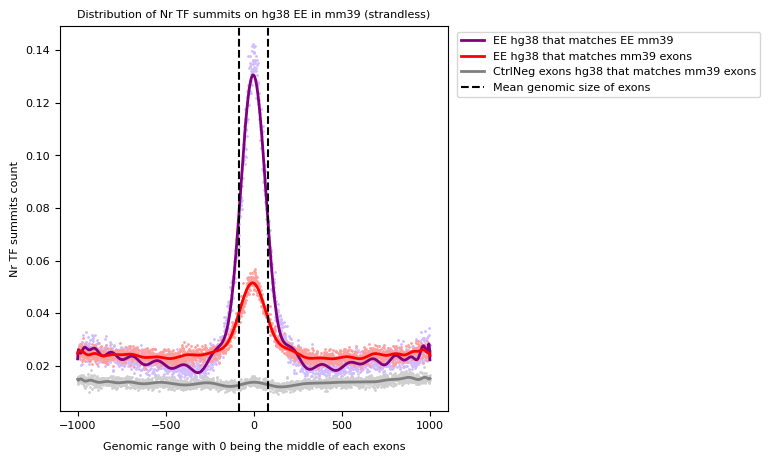

In [ ]:
plt.figure(figsize=(5, 5))
import  seaborn as sns
### EE
i, j = zip(*ee_new_norm.items())
i = list(i)
j = list(j)

mymodel2 = np.poly1d(np.polyfit(i, j, 34))
myline2 = np.linspace(-1000, 1000,1000)

plt.scatter(i, j,color=sns.color_palette("pastel")[4],s=1)
plt.plot(myline2, mymodel2(myline2),color="purple",linewidth=2,label='EE hg38 that matches EE mm39')

### Exons
i, j = zip(*exons_new_norm.items())
i = list(i)
j = list(j)

mymodel2 = np.poly1d(np.polyfit(i, j, 34))
myline2 = np.linspace(-1000, 1000,1000)

plt.scatter(i, j,color=sns.color_palette("pastel")[3],s=1)
plt.plot(myline2, mymodel2(myline2),color="red",linewidth=2,label='EE hg38 that matches mm39 exons')

### CtrlNeg
i, j = zip(*ctrlneg_new_norm.items())
i = list(i)
j = list(j)

mymodel2 = np.poly1d(np.polyfit(i, j, 34))
myline2 = np.linspace(-1000, 1000,1000)

plt.scatter(i, j,color=sns.color_palette("pastel")[7],s=1)
plt.plot(myline2, mymodel2(myline2),color="gray",linewidth=2,label='CtrlNeg exons hg38 that matches mm39 exons')

### Plot borders for mean size of exons
#Hsap is 164 so 82; Dmel is 399 so 199; Mmus is 175 so 87
plt.axvline(x = 82, color = 'k', label = 'Mean genomic size of exons', linestyle='--') 
plt.axvline(x = -82, color = 'k', linestyle='--')

### Plot parameters
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter()) #Set tick frequency to scale on the data correctly 

plt.legend(bbox_to_anchor=(1.01, 1),fontsize=8)

plt.xticks(size=8)
plt.yticks(size=8)

plt.gca().set_xlabel(xlabel = "Genomic range with 0 being the middle of each exons", labelpad=8, size=8)  
plt.gca().set_ylabel(ylabel = "Nr TF summits count",size=8)  

plt.title(label="Distribution of Nr TF summits on hg38 EE in mm39 (strandless)", fontdict=None, loc='center', pad=None, size=8)

plt.savefig("/home/mouren/Images/tls1/conservation/distrib_remap_hg38_to_mm39_lastz.pdf", format="pdf", bbox_inches="tight")

plt.show()
